In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv(r'web_traffic.csv')
data

,VisitID,Date,UserType,Device,SessionDuration,PagesVisited
0,1,2023-07-01,New,Mobile,120,3
1,2,2023-07-02,Returning,Desktop,300,5
2,3,2023-07-03,New,Tablet,240,4
3,4,2023-07-04,Returning,Mobile,180,3
4,5,2023-07-05,New,Desktop,350,6
5,6,2023-07-06,Returning,Tablet,260,4
6,7,2023-07-07,New,Mobile,190,3
7,8,2023-07-08,Returning,Desktop,400,7
8,9,2023-07-09,New,Tablet,210,4
9,10,2023-07-10,Returning,Mobile,220,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VisitID          10 non-null     int64 
 1   Date             10 non-null     object
 2   UserType         10 non-null     object
 3   Device           10 non-null     object
 4   SessionDuration  10 non-null     int64 
 5   PagesVisited     10 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [5]:
data.describe()

,VisitID,SessionDuration,PagesVisited
count,10.00000,10.000000,10.000000
mean,5.50000,247.000000,4.400000
std,3.02765,83.672643,1.349897
min,1.00000,120.000000,3.000000
25%,3.25000,195.000000,3.250000
50%,5.50000,230.000000,4.000000
75%,7.75000,290.000000,5.000000
max,10.00000,400.000000,7.000000


# Session Duration by Device

In [13]:
# average session duration for each device
avg_session_duration = data.groupby("Device")["SessionDuration"].mean()
# Sort average session duration in descending order
avg_session_duration_sorted = avg_session_duration.sort_values(ascending=False)

print(avg_session_duration_sorted)

Device
Desktop    350.000000
Tablet     236.666667
Mobile     177.500000
Name: SessionDuration, dtype: float64


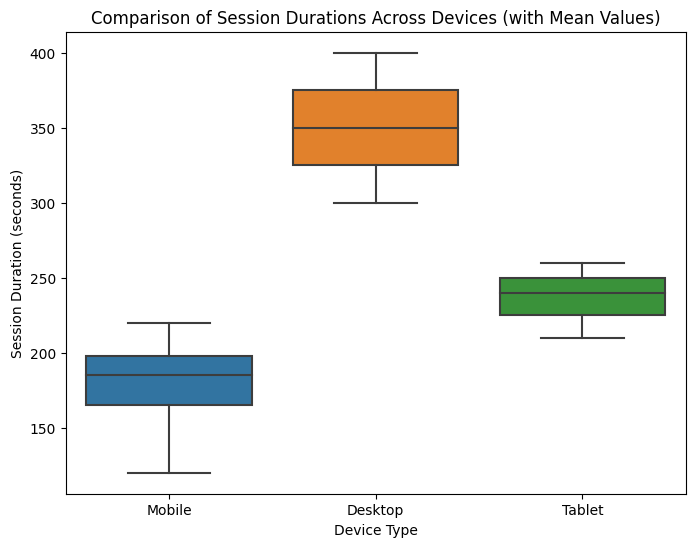

In [31]:
# the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Device"], y=data["SessionDuration"])
plt.xlabel("Device Type")
plt.ylabel("Session Duration (seconds)")
plt.title("Comparison of Session Durations Across Devices (with Mean Values)")
plt.show()

It clearly illustrates that Desktop users tend to have longer average session times compared to Tablet and Mobile users. Additionally, the dataset does not contain any outliers, indicating a relatively consistent pattern in session durations across devices.

# Pages Visited by User Type

In [16]:
# total pages visited per user type
pages_visited = data.groupby("UserType")["PagesVisited"].sum()
pages_visited

UserType
New          20
Returning    24
Name: PagesVisited, dtype: int64

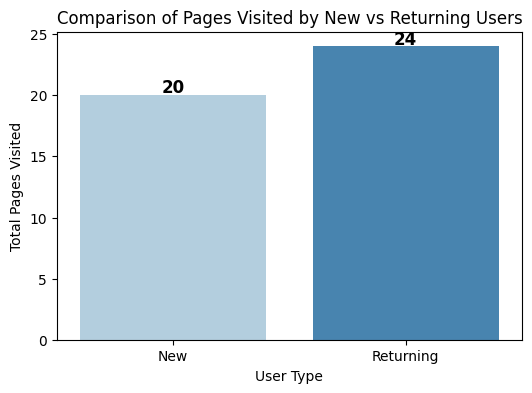

In [17]:
# the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=pages_visited.index, y=pages_visited.values, palette="Blues")

# Overlay values on the bars
for i, value in enumerate(pages_visited.values):
    plt.text(i, value + 0.2, f"{value}", ha='center', fontsize=12, color="black", fontweight="bold")

plt.xlabel("User Type")
plt.ylabel("Total Pages Visited")
plt.title("Comparison of Pages Visited by New vs Returning Users")
plt.show()

In Box plot it is clearly shows that returning users have a higher total page visit count, it could indicate stronger engagement.

# Trend Over Time: Average Session Duration

In [18]:
# Converting Date column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

# daily average session duration
daily_avg_session = data.groupby("Date")["SessionDuration"].mean()
daily_avg_session

Date
2023-07-01    120.0
2023-07-02    300.0
2023-07-03    240.0
2023-07-04    180.0
2023-07-05    350.0
2023-07-06    260.0
2023-07-07    190.0
2023-07-08    400.0
2023-07-09    210.0
2023-07-10    220.0
Name: SessionDuration, dtype: float64

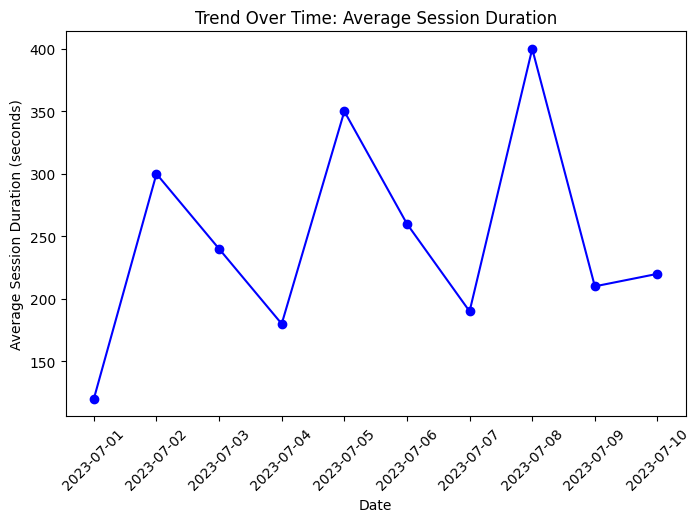

In [19]:
# the line chart
plt.figure(figsize=(8, 5))
plt.plot(daily_avg_session.index, daily_avg_session.values, marker="o", linestyle="-", color="blue")

plt.xlabel("Date")
plt.ylabel("Average Session Duration (seconds)")
plt.title("Trend Over Time: Average Session Duration")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

The line plot shows that a consistent upward trend, it suggests users are becoming more engaged, whereas a downward trend might indicate decreasing user interest.

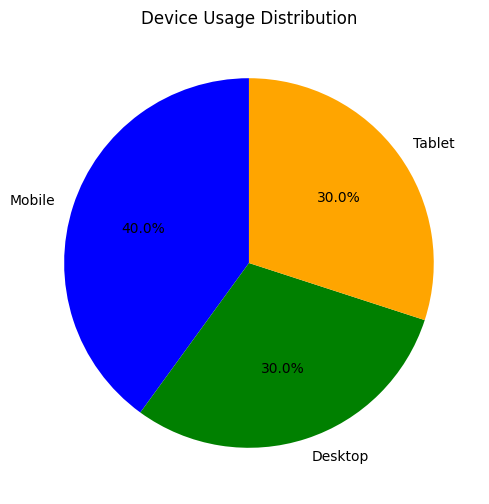

In [20]:
# device usage distribution
device_counts = data["Device"].value_counts()

# the pie chart
plt.figure(figsize=(6, 6))
plt.pie(device_counts, labels=device_counts.index, autopct="%1.1f%%", colors=["blue", "green", "orange"], startangle=90)
plt.title("Device Usage Distribution")
plt.show()

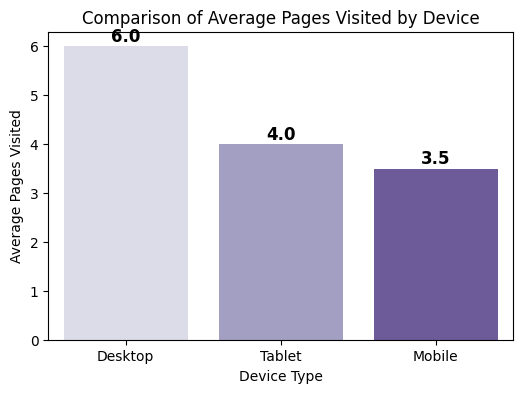

In [21]:

# average pages visited per device
avg_pages_visited = data.groupby("Device")["PagesVisited"].mean().sort_values(ascending=False)

# the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_pages_visited.index, y=avg_pages_visited.values, palette="Purples")

# Overlay values on the bars
for i, value in enumerate(avg_pages_visited.values):
    plt.text(i, value + 0.1, f"{value:.1f}", ha='center', fontsize=12, color="black", fontweight="bold")
plt.xlabel("Device Type")
plt.ylabel("Average Pages Visited")
plt.title("Comparison of Average Pages Visited by Device")
plt.show()

Peak Traffic Days:
Date
2023-07-01    1
2023-07-02    1
2023-07-03    1
2023-07-04    1
2023-07-05    1
2023-07-06    1
2023-07-07    1
2023-07-08    1
2023-07-09    1
2023-07-10    1
Name: VisitID, dtype: int64


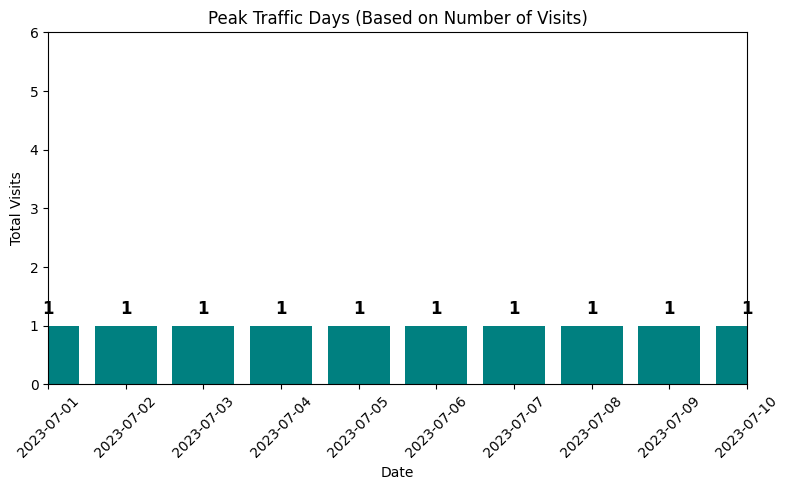

In [30]:

# Count visits per day
daily_visits = data.groupby("Date")["VisitID"].count()

# Identify peak traffic days
peak_days = daily_visits[daily_visits == daily_visits.max()]
print("Peak Traffic Days:")
print(peak_days)

# the bar chart
plt.figure(figsize=(8, 5))
plt.bar(daily_visits.index, daily_visits.values, color="teal")

# Highlight peak traffic days
for date, value in daily_visits.items():
    plt.text(date, value + 0.2, f"{value}", ha='center', fontsize=12, color="black", fontweight="bold")

# Set limits
plt.xlim([daily_visits.index.min(), daily_visits.index.max()])
plt.ylim([0, daily_visits.max() + 5])

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Total Visits")
plt.title("Peak Traffic Days (Based on Number of Visits)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusion:
1. Which device performs better? 

Based on the session duration and pages visited, Desktop users tend to have the longest average session times and visit the most pages. This suggests that Desktop users are more engaged compared to Mobile and Tablet users.

2. Are new or returning users more engaged? 

Returning users generally visit more pages than new users, indicating stronger engagement. If returning users consistently have higher session durations and page visits, this suggests that they find value in the website and are more likely to explore further.

3. Any noticeable trends over time? 

By analyzing daily average session durations, we can observe whether user engagement is increasing or decreasing. If session durations trend upward, it may indicate growing interest in the content, while a downward trend may suggest waning engagement.